# Testing OpenPose

In [2]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    os.chdir(project_root)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paths import DATA_DIR

In [4]:
# Load Video from Data Folder
video_path = DATA_DIR / "vileika_example_1.MOV"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise IOError(f"Cannot open video file: {video_path}")
else:
    print(f"Video loaded: {video_path}")

Video loaded: /home/tufman/src/personal/Deep-Learning-Based-Aggressive-Inline-Trick-Recognition-and-Performance-Feedback/data/vileika_example_1.MOV


In [17]:
# Extract Middle Frame from Video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_idx = 20
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
ret, frame = cap.read()

if not ret:
    raise ValueError(f"Could not read frame at index {frame_idx}")
else:
    print(f"Extracted frame {frame_idx} of {frame_count}")

Extracted frame 20 of 350


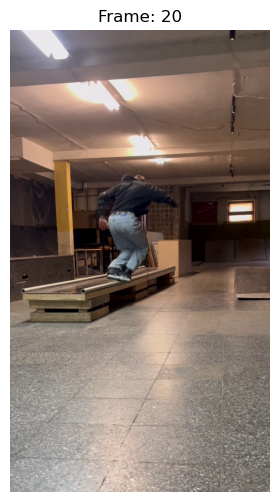

In [18]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title(f"Frame: {frame_idx}")
plt.axis('off')
plt.show()

In [22]:
import torch, openpifpaf

print("torch", torch.__version__, "cuda", torch.version.cuda, "gpu?", torch.cuda.is_available())
print("openpifpaf", openpifpaf.__version__)

ModuleNotFoundError: No module named 'torch'